## **Data Acquisition**

I followed the steps for collecting data for the assigment. Making sure to do everything right from stage 1 to 8. I made sure in all stages my hands were visible and the sink was in the background with no neccacery background noise. Within stage 8 I inlucded a towel to make things more accurate. I also made sure all the images were 150 by 150 pixels with 3 colours. This size makes it easier and quicker to work with the images when it comes to building the neural network because the computer does not have to deal with too many pixel.

Upon further inspection of the dataset I found that many of the images are too noisy and inconsistent meaning that when training the model it will give a low accuracy because of this I had to comb through each image and check if there viable or not if not I deleted them from the dataset. There was also some corrupt images which was handeled within the labelling errors section. The way I checked if images were too "noisy" is that if the hand does not fit 80% of the screen it is classed as noisy, if the hands were on different angles that does not fit the origonal WHO images I would also delete them as the model cannot find a pattern. I also deleted images with shadows or water on the hands aswell.

There was also some images that were in the incorrect folders for example I noticed that some of stage 5 images should have actually been in stage 6

Images within dataset
*   Stage 1 = 149
*   Stage 2  = 137
*   Stage 3 = 148
*   Stage 4 = 157
*   Stage 5 = 166
*   Stage 6 = 150
*   Stage 7 = 149
*   Stage 8 = 127

In total there is 1,183 pictures in the dataset


## **Data Initilization & Imports**

The following 2 cells are used to import all the libaries that is needed to train / processes and evaluate a convolutional neural network, the second cell initilizes the data so it can be used.

In [1]:
########################## IMPORTING ALL NEEDED LIBARIES ##########################
import cv2 # OpenCV 2 is imported for computer vision tasks
import numpy as np # Importing numpy as np for numerical computations
import matplotlib.pyplot as plt # Importing matplotlib for graphics / graphs as plt
from matplotlib.pyplot import figure # Importing matplotlib as figure also for graphics and graphs
from PIL import Image # Importing images from the PIL module for image processing tasks
import os #  Importing OS to fetch contetnt and modify files in this case images
import glob # Importing glob to check for files that match specific patterns / names
import tensorflow as tf # Importing tensorflow as tf which is a machine learning neural network library
from sklearn.model_selection import train_test_split # Importing sklear  for splitting data into training and test sets
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score # Importing this module to evalute the models performance
from tensorflow.keras.preprocessing import image  # importing the image module from tensorflow for processing and loading data within the module evalution
from tensorflow.keras.regularizers import l2 # Importing l2 which is a regulizer that helps prevent overfitting while training the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Importing the keras lib for real time data augmentation and preprocessing images
from tensorflow.keras.models import Sequential # Importing sequential from tensorflow to build layers in the neural network
from tensorflow.keras.layers import ( # Importing multiple things from the tensflow layers lib
    Dense, # Importing dense this is a standard neural network layer and is bascially how close nodes (neurons) are together
    Conv2D, # Importing the a 2D concoliton layer which is used within convolutional neural network training
    MaxPool2D, # Importing a max pooling layer used after batch sizing
    Flatten, # Flattens the input without affecting the batch size
    Dropout, # Using dropout to try and prevent overfitting in the neural network
    BatchNormalization, # Normalizing an input layer to improve training of the neural network
)
from google.colab import drive # imporitng google colab drive so we can mount google drive where the dataset is located
drive.mount('/content/drive') # mounting the drive contents

Mounted at /content/drive


In [2]:
########################## READING THE DATASET IMAGES ##########################
Stage_1 = glob.glob('/content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage1/*.*') # Reading Stage 1 images
Stage_2 = glob.glob('/content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage2/*.*') # Reading Stage 2 images
Stage_3 = glob.glob('/content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage3/*.*') # Reading Stage 3 images
Stage_4 = glob.glob('/content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage4/*.*') # Reading Stage 4 images
Stage_5 = glob.glob('/content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage5/*.*') # Reading Stage 5 images
Stage_6 = glob.glob('/content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage6/*.*') # Reading Stage 6 images
Stage_7 = glob.glob('/content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage7/*.*') # Reading Stage 7 images
Stage_8 = glob.glob('/content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage8/*.*') # Reading Stage 8 images

## **Labelling Errors**

There are also some other labelling issues, like incorrect pixel ratio as some students decided to upload images that are not 150 by 150, this means that the files are too large and need to be changed to be 150 by 150. Also some of the students have not followed the data labeling standard that was within the assigment brief making some pictures hard to instantly know what stage its supposed to be.

Label error checking is important as it cleans the data to make sure that the deep learning algorithm can correctly predict results at the end.

Here you can see the code loops through all of the images using a for loop and the enumerate method which checks all the stages insead of having to copy and paste the code for every stage. After the code makes sure the size is 150 by 150 and the colour channel is set to RGB. Then there is a try catch checker that looks for images with the exeption **UnidentifiedImageError** this exeption means that the image is corrupt, instead of deleting them from the dataset we can just skip this image using the expect function within python.

In [3]:
########################## CHECKING LABELLING ERRORS / MOVING DATA ##########################
img_size = (150, 150, 3) # Setting the image size and colour of images

data = [] # where all the images are stored
labels = [] # where all the labels are stored for the images

processed_count = 0  # Counter for successfully processed images
skipped_count = 0  # Counter for skipped images due to corruption

# For loop to iterate through stages using the enumerate function so code does not have to be copied and pasted
for i, stage in enumerate([Stage_1, Stage_2, Stage_3, Stage_4, Stage_5, Stage_6, Stage_7, Stage_8]):
    for img_path in stage: # For loop to loop through the image location within the stages
        try: # try catch statement to try the elements below if unsuccessful go to except statement
            image = tf.keras.preprocessing.image.load_img(img_path, color_mode='rgb', target_size=img_size) # passing image, colour mode and the target size to keras preprocessing function
            image = np.array(image) # making the image variable store the image as a numpy array
            data.append(image) # appending image to the array "data"
            labels.append(i) # appending label information to the array "labels"
            processed_count += 1  # Increment the count of processed images
            print(f"Image {img_path} successfully pushed to data / label arrays") # If image successfully moves to array print success message
        except Image.UnidentifiedImageError: # exception to check for the UnidentifiedImageError prompt basically means the image is corrupt
            skipped_count += 1  # Increment the count of skipped images
            print(f"Skipping image {img_path}, because exception UnidentifiedImageError") # If image is corrupt pass this error message

data = np.array(data) # parsing the "data" array to a numpy array
labels = np.array(labels) # parsing the "labels" array to a numpy array

print(f"Total images processed: {processed_count}") # Printing amount of images processed
print(f"Total images skipped due to corruption: {skipped_count}") # Printing amount of corrupt images


Image /content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage1/10_Stage_1_u2063755.jpg successfully pushed to data / label arrays
Image /content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage1/2_Stage_1_u2083061.jpg successfully pushed to data / label arrays
Image /content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage1/1_Stage_1_u2083270.jpg successfully pushed to data / label arrays
Image /content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage1/1_Stage_4_u2173617.jpg successfully pushed to data / label arrays
Skipping image /content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage1/1Stage_1_u2083060.JPEG, because exception UnidentifiedImageError
Image /content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage1/1Stage_1_u2179615.jpg successfully pushed to data / label arrays
Image /content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage1/1_Stage_8_u2173617.jpg successfully pushed to data / label arrays
Image /content/drive/MyDrive/Colab Notebooks/ai

## **Data Pre-Processing and data splitting**



Here I am splitting the data into there individual training sets setting, I am also pre processing the data which consists of changing the datas shape. This measn that we are chaning the datas pixels and colour spectrum to a more deisirable size here I have chosen 150 b 150 as it will be faster for the model to complete. Next I am converiting the data into a float32 value which makes sure the model understands what It is reading we are then normalizing the training sets so all the data is either 0 or 1 once the conversion and normalization is complete we then use the onehot encode format to encode the data.

In [4]:
########################## SPLITTING DATASET / PRINTING ##########################
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1) # Splitting the dataset into training and testing sets 20% of the data is used for testing, the random state parameter guarantees consitent results
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) # Splitting the dataset into training and testing sets 20% of the data is used for testing, the random state parameter guarantees consitent results
print("Total training intences: " + str(len(y_train))) # Prints total number the total number of instances within the dataset
print("Train Data:" + str(np.unique(y_train, return_counts=True))) # Prints the unique labels in the training datset with the counts of each unique label
print("Total Validation intences: " + str(len(y_val))) # Prints thethe total number of instances in the validation dataset used to tune paramaters within the code
print("Validation Data:" + str(np.unique(y_val, return_counts=True))) # Prints the unique labels and thier counts in the validaton dataset
print("Total testing intences: " + str(len(y_test))) # Prints the total number of instances in the testing dataset used to check the models perforamce
print("Test Data:" + str(np.unique(y_test, return_counts=True))) # Prints the unique labels and thier counts in the testing dataset

Total training intences: 739
Train Data:(array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 88,  93, 100,  85, 101,  92,  93,  87]))
Total Validation intences: 185
Validation Data:(array([0, 1, 2, 3, 4, 5, 6, 7]), array([19, 17, 19, 30, 27, 31, 23, 19]))
Total testing intences: 231
Test Data:(array([0, 1, 2, 3, 4, 5, 6, 7]), array([32, 25, 25, 36, 37, 26, 29, 21]))


In [5]:
########################## CHANGING DATASET SHAPE ##########################
print("\n\nBefore Reshaping the shape of train and test dataset:") # Printing a title of the next varible for context
print(X_train.shape) # Printing the current shape of the training dataset
print(X_val.shape) # Printing the current shape of the validation dataset
print(X_test.shape) # Printing the current shape of the testing dataset
X_train = X_train.reshape((X_train.shape[0], 150, 150, 3)) # Reshaping the training dataset to have images of size 150 by 150 by 3 colours ways
X_val = X_val.reshape((X_val.shape[0], 150, 150, 3)) # Reshaping the validation dataset to have images of size 150 by 150 by 3 colours ways
X_test = X_test.reshape((X_test.shape[0], 150, 150, 3)) # Reshaping the testing dataset to have images of size 150 by 150 by 3 colour ways
print("After Reshaping the shape of train and test dataset:") # Printing a title of the next varible for context
print(X_train.shape) # Printing the new shape (size x by x by x) of the dataset
print(X_val.shape) # Printing the new shape (size x by x by x) of the dataset
print(X_test.shape) # Printing the new shape (size x by x by x) of the dataset



Before Reshaping the shape of train and test dataset:
(739, 150, 150, 3)
(185, 150, 150, 3)
(231, 150, 150, 3)
After Reshaping the shape of train and test dataset:
(739, 150, 150, 3)
(185, 150, 150, 3)
(231, 150, 150, 3)


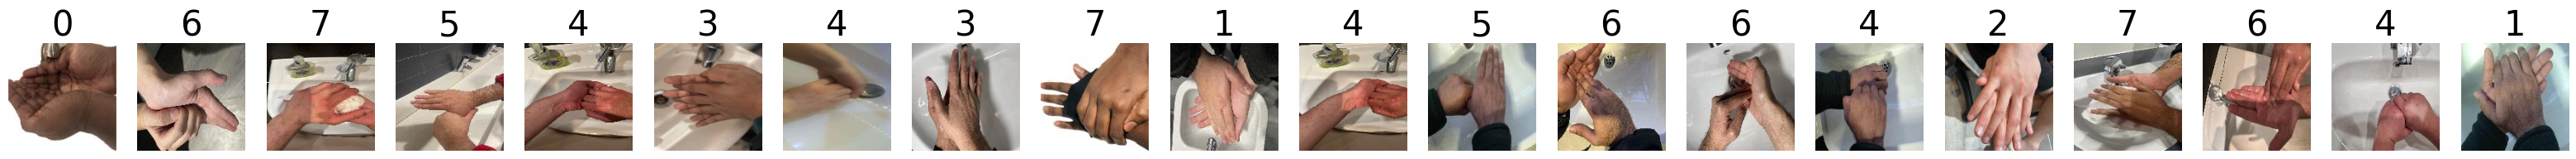

In [6]:
########################## PLOTTING IMAGES FOR VISUALISATION ##########################
plt.figure(figsize=(40,40)) # creating a plot and the size is set to 40 by 40 for the images

num_images = 20 # The number of images within the plot
for i in range(num_images): # for loop to iterate through the number of images
    row = X_train[i] # extracts image i from the x_train dataset and stores in as a row varible
    label = y_train[i] # extract image i from the y_train dataset and stores in a label varible

    image = row # assigns the content of row to a varible called image
    plt.subplot(1, num_images, i+1) # configurating the plot to have 1 row 20 images and place the next image +1 of i
    plt.title(label, fontdict={'fontsize': 30}) # setting the title for the plot and setting the size to 30px
    plt.axis('off') # disabling the axis for the plot
    plt.imshow(image, cmap='gray') # If images are greyscale show them

In [7]:
########################## CONVERSION / NORMALIZATION ##########################
X_train = X_train.astype(np.float32) # Converting the training data to float32
X_val = X_val.astype(np.float32) # Converting validation data to float32
X_test = X_test.astype(np.float32) # Converting test data to float32

X_train /= 255 # Normalizing the training data so that the pixels values are between 0 and 1
X_val /= 255 # Normalizing the validation data so that the pixels values are between 0 and 1
X_test /=  255 # Normalizing the test data so that the pixel values are between 0 and 1

In [8]:
########################## CLASS AMOUNT / ONEHOT ENCODING ##########################
NUM_CLASSES = 8 # Defining the number of unique classes within the labels of the dataset

print("Before label conversion to categorical (y_train): ", y_train[0:5]) # Printing title for context
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES) # encoding with the onehot method converting y_train lables into the onehot format
print("After label conversion to categorical (y_train): ", y_train[0:5]) # Printing title for context

print("Before label conversion to categorical (y_val): ", y_val[0:5]) # Printing title for context
y_val = tf.keras.utils.to_categorical(y_val, NUM_CLASSES) # encoding with the onehot method converting y_val labels into the onehot format
print("After label conversion to categorical (y_val): ", y_val[0:5]) # Printing title for context

print("Before label conversion to categorical (y_test): ", y_test[0:5]) # Printing title for context
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES) # encoding with the the onehot method converting y_test labels into the onehot format
print("After label conversion to categorical (y_test): ", y_test[0:5]) # Printing title for context

Before label conversion to categorical (y_train):  [0 6 7 5 4]
After label conversion to categorical (y_train):  [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]
Before label conversion to categorical (y_val):  [4 3 4 2 7]
After label conversion to categorical (y_val):  [[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
Before label conversion to categorical (y_test):  [2 7 6 1 5]
After label conversion to categorical (y_test):  [[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


## **Convolutional Neural Network**



Here I am creating the convolutional neural network layers, Firstly we create a sequential network with the following layers, the 2D within the maxpool and conv stands for 2 dimensional as we are working with 2D images.

**Conv2D**
The conv2D layer is responsible for extracing eatures from the input image through convoltion operations.

**MaxPool2D**
The MaxPool2D layer is a pooling layer which reduces the demensions of the features which is compressing the data dn reducing the number of paramaters per image.

**Batch Normlaization**
I used to standardize input layers and to decrease neural network overfitting.

**Flatten**
The Flattern layer is responsible for making the 2D features into 1D vectors making it possible to feed this data into the dense layers.

**Dense**
The dense layers are fully connected neural network layers used for classifcation which are used as the output to classify input classes.

**Dropout**
The dropout layer is used to prevent overfitting by randomly setting a faction of the input units to 0 at each epoch update.

**Filters**
This specifies the number of output filters in the network. The filters are used to traverse the input images and detect specific features like edges, textures. Setting filters to 64 means 64 feature maps.

**Kernal Size**
The kernal size is used to scan the image in a 3x3 block sliding over the image gather data.

**Padding**
Ensures that the output operation has the same hight and width as the input.

**Activation Function**
This specifeis the activation function the one I am using is relu which is a non linear function enabling it to learn more complext patterns as our data is noisy and not very good this is usefull.

**Input Shape**
Defines the size width high of our images.

Once all of the layers have been given there paramaters we can create the data augmentation which bascailly train the model on realworld types of data making images zoom, shifts the width and hights and can flit horizontal or vertical the image.

We can then compile our model and then train it on our dataset.

In [56]:
########################## CREATING CONVOLUTIONAL NEURAL NETWORK ##########################
model = tf.keras.Sequential() # Creating a linear stack of layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=img_size)) # Adds a 2D convolution layer with 96 filters, a 3x3 kernel, ReLU activation, and input shape as defined
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')) # Adds a max pooling layer with a 2x2 pool size and a strides of 2x2
model.add(BatchNormalization()) # Adding Batch Normalization to normalize activations
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')) # Adds another 2D convolution layer with same parameters as before
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')) # Adds another max pooling layer with the same paramters as before
model.add(BatchNormalization()) # Adding Batch Normalization to normalize activations
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')) # Adds a third 2D convolution layer with the same parameters.
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')) # Adds a third max pooling layer with the same paramters
model.add(BatchNormalization()) # Adding Batch Normalization to normalize activations
model.add(Flatten()) # Flattens the input to make it possible to add dense layers after convolutional layers
model.add(Dense(units=256, activation='relu')) # Adds a densely-connected layer with 256 units, relu activation
model.add(Dropout(0.4)) # Adds dropout layer for regularization
model.add(Dense(units=128, activation='relu')) # Adds a densely-connected layer with 128 units, relu activation
model.add(Dropout(0.3)) # Adds another dropout layer for regularization
model.add(Dense(units=NUM_CLASSES, activation='softmax')) # Adds a softmax layer with a number of units equal to the number of classes for multi-class classification

In [57]:
########################## DATA AUGMENTATION ##########################
datagen = ImageDataGenerator(
    zoom_range=0.1, # Specifies the range for random zoom
    width_shift_range=0.1, # Specifies the range for random horizontal shifts
    height_shift_range=0.1, # Specifies the range for random vertical shifts
    horizontal_flip=False, # Allow horizontal flipping
    vertical_flip=False # Disabling vertical flipping
)

batch_size = 16 # Setting the batch size for training

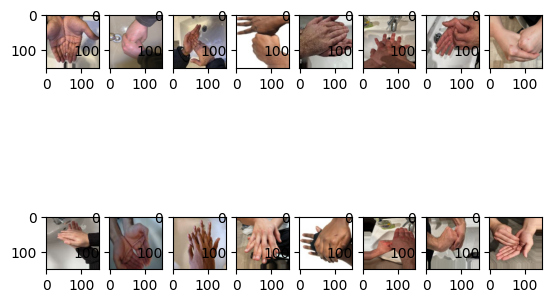

In [58]:
########################## PLOTTING IMAGES ##########################
img_iter = datagen.flow(X_train, y_train, batch_size=batch_size) # Creating a generator that augments the images in raltime within the batch size

x, y = img_iter.next() # Gets the next batch of images and labels
fig, ax = plt.subplots(nrows=2, ncols=8) # Creating a new figure with 2 rows and 8 coloumns
for i in range(batch_size): # For loop that iterates throguth the batch size
    image = x[i] # Gets an image from the batch
    ax.flatten()[i].imshow(np.squeeze(image)) # Display the image on the i + 1 plot
plt.show() # Showing the plot

In [59]:
datagen.fit(X_train) # Fitting the paramters to the data augmentation datagen to the training data

In [60]:
model.summary() # Printing out the summary of the neural network model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_9 (Bat  (None, 75, 75, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 38, 38, 64)        0         
 ng2D)                                                           
                                                      

In [61]:
########################## COMPILING MODEL ##########################
model.compile(
    loss='categorical_crossentropy', # Setting the loss function for training
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Using the adam optimizer with a learning rate of 0.001
    metrics=['accuracy'] # Tracking metrics during the training and evaluation process
)

In [62]:
########################## TRAINING MODEL ##########################
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size), # Specifies the augmented data genreator as the training data source
    epochs=50, # Setting the number of times the model will be trained on the full dataset
    steps_per_epoch=len(X_train) / batch_size, # Setting the numver of batches to execute per epoch
    validation_data=(X_val, y_val), # Providing the validation dataset to evalute the models performance
)

Epoch 1/50
46/46 [==============================] - 9s 138ms/step - loss: 5.1791 - accuracy: 0.1394 - val_loss: 2.2525 - val_accuracy: 0.1676
Epoch 2/50
46/46 [==============================] - 4s 93ms/step - loss: 2.9110 - accuracy: 0.1894 - val_loss: 2.9025 - val_accuracy: 0.1081
Epoch 3/50
46/46 [==============================] - 4s 88ms/step - loss: 2.2863 - accuracy: 0.1637 - val_loss: 2.8283 - val_accuracy: 0.1243
Epoch 4/50
46/46 [==============================] - 6s 123ms/step - loss: 2.0836 - accuracy: 0.1664 - val_loss: 2.9960 - val_accuracy: 0.1135
Epoch 5/50
46/46 [==============================] - 4s 86ms/step - loss: 2.0533 - accuracy: 0.1516 - val_loss: 2.8518 - val_accuracy: 0.1027
Epoch 6/50
46/46 [==============================] - 5s 101ms/step - loss: 2.0494 - accuracy: 0.1597 - val_loss: 2.4423 - val_accuracy: 0.1784
Epoch 7/50
46/46 [==============================] - 8s 181ms/step - loss: 2.0250 - accuracy: 0.1583 - val_loss: 2.3471 - val_accuracy: 0.1568
Epoch 8/5

## **Model Evalution**

As you can see the test accuracys is only outputting 35% which is very low and I think is inadiqaute however the dataset that was given was VERY noisy and some images were incorrect so I had to delete over 50% of the images by doing this the accuracy will also decrease as the neural net has less good images to train on and the trying to train on the bad images will create overfitting and give inacurate results. You can tell the model is still overfitting by looking at the percision, recall and f1 scores compared with the augmentation and model.evaulate scores.

In [63]:
########################## MODEL REPORTS ##########################
loss, accuracy = model.evaluate(X_test, y_test) # Evaluating the model based on the test dataset
print('Test accuracy: %.2f' % (accuracy)) # Printing the accuracy of the model to 2 decimal places

y_pred = model.predict(X_test) # Predicting the classes for the dataset

y_actual = np.argmax(y_test,axis=1) # Converting the onehot encoded labels into class labels again
print(y_actual[0:25]) # Priting the first 25 class labels
y_pred = np.argmax(y_pred,axis=1) # Converting the onehot enocded labels into calss labels again
print(y_pred[0:25]) # Priting the first 25 class labels

print(classification_report(y_actual,y_pred)) # Printing the classification report for the model
print(confusion_matrix(y_actual,y_pred)) # Printing the confustion matrix report for the model
print(accuracy_score(y_actual,y_pred)) # Printing the accuracy score report for the model

8/8 [==============================] - 0s 16ms/step - loss: 1.5608 - accuracy: 0.3550
Test accuracy: 0.35
8/8 [==============================] - 0s 16ms/step
[2 7 6 1 5 3 7 2 4 7 6 0 5 5 1 4 6 5 4 4 6 7 1 3 3]
[2 1 1 2 1 2 0 1 1 4 6 1 1 2 1 1 1 4 1 1 1 1 1 2 1]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        32
           1       0.10      0.48      0.16        25
           2       0.27      0.32      0.29        25
           3       1.00      0.14      0.24        36
           4       0.69      0.24      0.36        37
           5       0.92      0.42      0.58        26
           6       0.85      0.38      0.52        29
           7       1.00      0.24      0.38        21

    accuracy                           0.35       231
   macro avg       0.69      0.36      0.40       231
weighted avg       0.71      0.35      0.41       231

[[21  7  2  0  0  0  2  0]
 [ 2 12 11  0  0  0  0  0]
 [ 1 16  8  0  0  0  0  0]
 [ 1 2

As you can see via the graphs my models is slightly overiftting, I have tried multiple different methods to avoid the overfitting including L2 regularisation, early stopping distances and batch normalisation, the best results I got was from batch normalisation it has not stopped overfitting but I think it has done a good job at stopping overfitting. The model loss drops off really fast however does not converge over 50 epochs maybe increaseing the epoches will improve my score?

as you can see the model accuracy graph does stay on trend but is very up and down.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


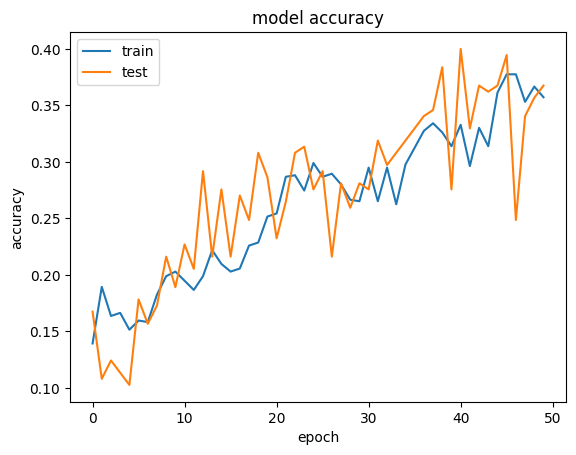

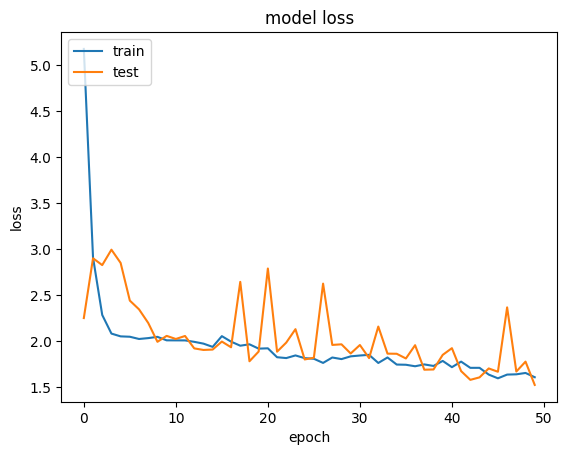

In [64]:
########################## GRAPH REPORT ##########################
print(history.history.keys()) # Printing the keys within the history object to check the metrics are correctl tracked turing training

plt.plot(history.history['accuracy'], label="Training") # Plotting the training accuracy per epoch
plt.plot(history.history['val_accuracy'], label ="Validation") # Plotting the validation accuracy per epoch
plt.title('model accuracy') # Creating the title for the graph
plt.ylabel('accuracy') # Creating the y label for the graph
plt.xlabel('epoch') # Creating the x label for the graph
plt.legend(['train', 'test'], loc='upper left') # Making sure the labels and test are placed in the upper left in the plot
plt.show() # Display the plot

plt.plot(history.history['loss'], label="Training") # Plotting the training loss per epoch
plt.plot(history.history['val_loss'], label ="Validation") # Plotting the validation loss per epoch
plt.title('model loss') # Creating the title for the graph
plt.ylabel('loss') # Creating the y label for the graph
plt.xlabel('epoch') # Creating the x label for the graph
plt.legend(['train', 'test'], loc='upper left') # Making sure the labels and test are palced in the upper left in the plot
plt.show() # Display the plot

In [65]:
########################## PREDICTING IMAGES ##########################
from tensorflow.keras.preprocessing import image # importing preprocessing as image
import numpy as np # importing numpty as np
import matplotlib.pyplot as plt # importing pyplot as plt

def predict_image(filename, model): # Creating a function to predict a given image
    img_ = image.load_img(filename, target_size=img_size) # Loading and resizingt he image to the target size
    img_array = image.img_to_array(img_) # Converting the PIL image to the numpty array
    img_processed = np.expand_dims(img_array, axis=0) # Creating a batch dimension for the image array
    img_processed /= 255. # normalizing the image data so its only 0s and 1s

    prediction = model.predict(img_processed) # Making a prediction using the trained model
    index = np.argmax(prediction) # Getting the index of the gihest probability from the prediction
    plt.title("Prediction - {}".format(str(index).title()), size=18, color='red') # Setting the title of the plot as the predicted result
    plt.imshow(img_array) # Displaying the image

Here you can see that I am correctly predicting and image as stage 0 (stage 1) This could be because the image is clear and the image is taken from an upwards angle making sure that the neural net can see a distinct pattern.

1/1 [==============================] - 0s 29ms/step


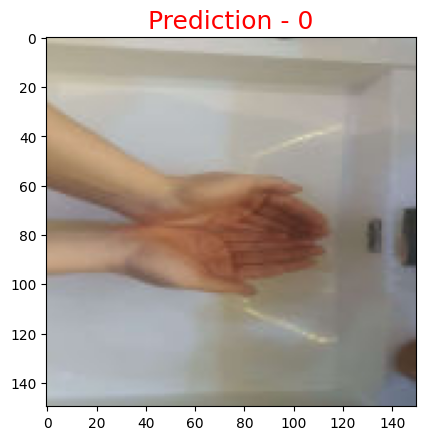

In [66]:
########################## PREDICTING IMAGE ##########################
predict_image('/content/drive/MyDrive/Colab Notebooks/ai ass 2/dataset/Stage1/stage1_U2166829_1.jpg', model) # Predicting a certain image